In [1]:
import os
import numpy as np
from skimage import io, color

In [2]:
trainingData = np.load('fruits.npy')
trainingData = trainingData.reshape(trainingData.shape[0], -1)

In [11]:
trainingData.shape

(2933, 10000)

In [3]:
labels = os.listdir('dataset/')
labelName = {i : labels[i] for i in range(len(labels))}

In [4]:
labels

['Apple Red 2', 'Banana', 'Lemon', 'Lychee', 'Mango', 'Orange']

In [5]:
labelName

{0: 'Apple Red 2',
 1: 'Banana',
 2: 'Lemon',
 3: 'Lychee',
 4: 'Mango',
 5: 'Orange'}

In [6]:
labelLength = []
for root, folder, files in os.walk('dataset/'):
    labelLength.append(len(files))

In [7]:
labelLength

[0, 492, 490, 492, 490, 490, 479]

In [8]:
outputLabels = np.zeros((len(trainingData), 1))
slice_1 = 0
slice_2 = 0
for i in range(len(labelLength)):
    slice_1 += labelLength[i]
    slice_2 += labelLength[i+1]
    print(slice_1, slice_2)
    outputLabels[slice_1:slice_2, :] = i

0 492
492 982
982 1474
1474 1964
1964 2454
2454 2933


IndexError: list index out of range

In [9]:
outputLabels

array([[0.],
       [0.],
       [0.],
       ...,
       [5.],
       [5.],
       [5.]])

In [10]:
def distance(x1,x2):
    return np.sqrt(sum((x1 - x2) ** 2))

In [12]:
def knn(x, train,k):
#     we need to calculate distance of input image with each image of
#     traing data, so we find out shape of training data
    n = train.shape[0]
    dist = []
    for i in range(n):
#         we calculate distance b/w out input image and training image
#         and append the distances in a list
        dist.append(distance(x, train[i]))
#     convert distance list into numpy array
    dist = np.asarray(dist)
#     sort the distance to get nearest or minimum distances
#     so we use argsort which will give indexes of sorted data
    indexes = np.argsort(dist)[:k]
    sortedLables = outputLabels[indexes]
    counts = np.unique(sortedLables, return_counts=True)
#     ([0,1,3], [3,3,4])
    return counts[0][np.argmax(counts[1])]

In [14]:
testImg = color.rgb2gray(io.imread('test_1.jpg'))

In [15]:
testImg.shape

(100, 100)

In [16]:
labelIndex = knn(testImg.flatten(), trainingData, 5)
labelName[int(labelIndex)]

'Lychee'

In [33]:
testImg = color.rgb2gray(io.imread('test_2.png'))

In [34]:
import matplotlib.pyplot as plt

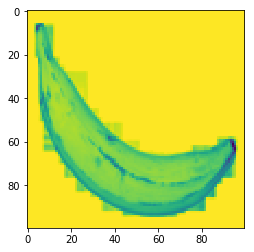

In [35]:
plt.imshow(testImg)
plt.show()

In [36]:
labelIndex = knn(testImg.flatten(), trainingData, 5)
labelName[int(labelIndex)]

'Banana'